CNN : CIFAR-10

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


2023-06-12 23:34:08.269032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print('x_tarin : ', np.shape(x_train))
print('t_tarin : ', np.shape(t_train))
print('x_test : ', np.shape(x_test))
print('t_test : ', np.shape(t_test))

x_tarin :  (50000, 32, 32, 3)
t_tarin :  (50000, 1)
x_test :  (10000, 32, 32, 3)
t_test :  (10000, 1)


In [3]:
print('x_train 1번째 이미지 shape : ', x_train[0].shape)
x_train[0]

x_train 1번째 이미지 shape :  (32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

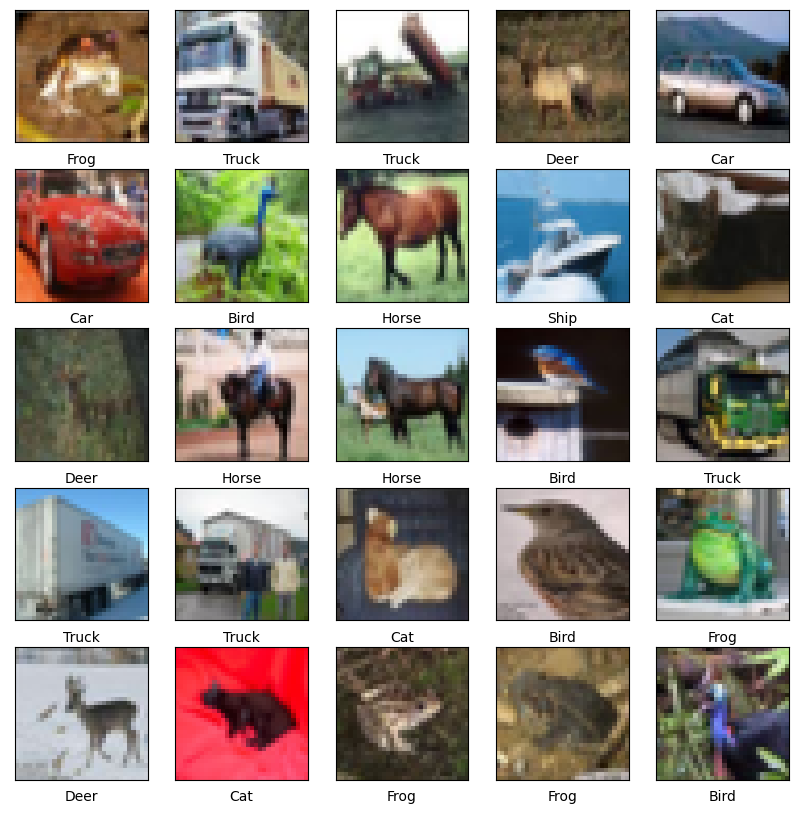

In [4]:
label_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(label_names[t_train[i][0]])
plt.show()
    

In [5]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print('x_train: ', np.shape(x_train))
print('t_train: ', np.shape(t_train))
print('x_test: ', np.shape(x_test))
print('t_test: ', np.shape(t_test))

x_train:  (50000, 32, 32, 3)
t_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
t_test:  (10000, 1)


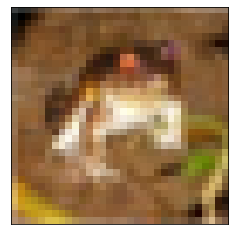

In [6]:
image_0 = x_train[0]
plt.xticks([])
plt.yticks([])
plt.imshow(image_0, cmap = 'gray')
plt.show()

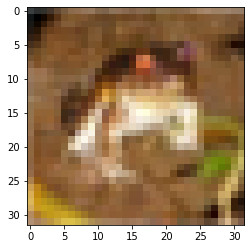

In [7]:
plt.imshow(x_train[0])
plt.show()

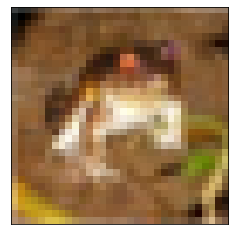

In [8]:
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[0])
plt.show()

In [9]:
t_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
for i in range(5):
    print(t_train[i])

[6]
[9]
[9]
[4]
[1]


In [11]:
for i in range(5):
    print(t_train[i][0])

6
9
9
4
1


In [12]:
#정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#숫자 => One-hot Vector(Encoding)
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)
print('One-hot Vector 적용 후 t_train shape : ', t_train.shape)
print('One-hot Vector 적용 후 t_test shape : ', t_test.shape)

One-hot Vector 적용 후 t_train shape :  (50000, 10)
One-hot Vector 적용 후 t_test shape :  (10000, 10)


In [13]:
#높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3

#순차적 모델을 만들기 위한 Sequential(함수)
model = Sequential(name ='CIFAR10_CNN')

#Convolution layer 와 MaxPooling layer를 통해 이미지 특징 추출
#Convolution layer=> filters : 필터 개수, kernel_size: 커널(필터) 크기
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu',
                input_shape = (width, height, channel)))
#pool_size : MaxPooling의 Window size
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#추출한 특징을 완전연결 계층(Dense)으로 전달하기 위해 Flatten 계층을 통해 1차원으로 변경
model.add(Flatten())

#출력층(완전연결 계층)
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer  =Adam(learning_rate = 0.001), metrics = ['accuracy'])
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        

In [14]:
#학습하기
model.fit(x_train, t_train, epochs= 10, batch_size = 16)

Epoch 1/10
3125/3125 [==============================] - 110s 34ms/step - loss: 1.3399 - accuracy: 0.5229
Epoch 2/10
3125/3125 [==============================] - 101s 32ms/step - loss: 0.9316 - accuracy: 0.6745
Epoch 3/10
3125/3125 [==============================] - 108s 35ms/step - loss: 0.7847 - accuracy: 0.7270
Epoch 4/10
3125/3125 [==============================] - 108s 35ms/step - loss: 0.6910 - accuracy: 0.7612
Epoch 5/10
3125/3125 [==============================] - 108s 35ms/step - loss: 0.6201 - accuracy: 0.7833
Epoch 6/10
3125/3125 [==============================] - 107s 34ms/step - loss: 0.5564 - accuracy: 0.8044
Epoch 7/10
3125/3125 [==============================] - 107s 34ms/step - loss: 0.5001 - accuracy: 0.8252
Epoch 8/10
3125/3125 [==============================] - 114s 37ms/step - loss: 0.4496 - accuracy: 0.8421
Epoch 9/10
3125/3125 [==============================] - 122s 39ms/step - loss: 0.4070 - accuracy: 0.8596
Epoch 10/10
3125/3125 [==============================] 

1/1 [==============================] - 0s 266ms/step
예측 : Ship\ 정답 : Cat


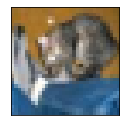

1/1 [==============================] - 0s 72ms/step
예측 : Ship\ 정답 : Ship


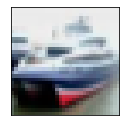

1/1 [==============================] - 0s 79ms/step
예측 : Ship\ 정답 : Ship


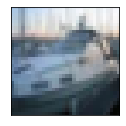

1/1 [==============================] - 0s 64ms/step
예측 : Ship\ 정답 : Airplane


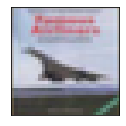

1/1 [==============================] - 0s 66ms/step
예측 : Frog\ 정답 : Frog


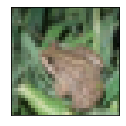

1/1 [==============================] - 0s 57ms/step
예측 : Frog\ 정답 : Frog


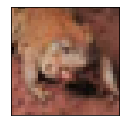

1/1 [==============================] - 0s 55ms/step
예측 : Car\ 정답 : Car


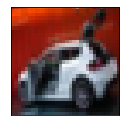

1/1 [==============================] - 0s 60ms/step
예측 : Frog\ 정답 : Frog


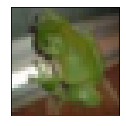

1/1 [==============================] - 0s 49ms/step
예측 : Cat\ 정답 : Cat


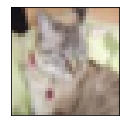

1/1 [==============================] - 0s 57ms/step
예측 : Car\ 정답 : Car


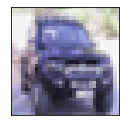

In [15]:
#높이, 너비, 채널 (RGB) 설정
width = 32
height = 32
channel = 3

#정답 레이블
label_name = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

#10개의 test_data로 성능 확인
for i in range(10):
    #출력 이미지 크기 설정
    plt.figure(figsize= (2,2))
    
    #test data를 통한 예측
    output = model.predict(x_test[i].reshape(1, width, height, channel))
    #이미지 출력
    plt.xticks([])
    plt.yticks([])z
    plt.imshow(x_test[i].reshape(width, height, channel))
    
    #np.argmax()는 labels의 인덱스(숫자)가 되어 label의 요소들(이름들)을 출력
    print('예측 : ' + label_names[np.argmax(output)] + '\ 정답 : '  + label_names[np.argmax(t_test[i])])
    plt.show()

In [18]:
loss, accuracy = model.evaluate(x_test, t_test, verbose=1)
print('test loss : ', round(loss, 6))
print('test accuracy : ', round(accuracy*100.3), '%')

313/313 [==============================] - 8s 23ms/step - loss: 0.9550 - accuracy: 0.7344
test loss :  0.955043
test accuracy :  74 %


2. CNN 실습(2) : Fashion MNIST

In [19]:
from tensorflow.keras.datasets import fashion_mnist

In [21]:
# numpy, tensorflow 라이브러리
import numpy as np
import tensorflow as tf

#숫자-> One-hot Vector(Encoding)를 위한 라이브러리
from tensorflow.keras.utils import to_categorical

#CIFAR-10 데이터셋을 가져오기 위한 라이브러리
from tensorflow.keras.datasets import fashion_mnist

#순차적인 모델을 만들기 위한 Sequential 함수
from tensorflow.keras.models import Sequential

#필요한 층들을 가지고 있는 layers 라이브러리
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#optimzer를 위한 라이브러리(이번 예제에서는 Adam 사용)
from tensorflow.keras.optimizers import Adam

#데이터를 시각화할 수 있는 라이브러리
import matplotlib.pyplot as plt

In [23]:
(x_train_fashion, t_train_fashion), (x_test_fashion, t_test_fashion) = fashion_mnist.load_data()
print('x_train_fashion :', np.shape(x_train_fashion))
print('t_train_fashion :', np.shape(t_train_fashion))
print('x_test_fashion :', np.shape(x_test_fashion))
print('t_test_fashion :', np.shape(t_test_fashion))

x_train_fashion : (60000, 28, 28)
t_train_fashion : (60000,)
x_test_fashion : (10000, 28, 28)
t_test_fashion : (10000,)


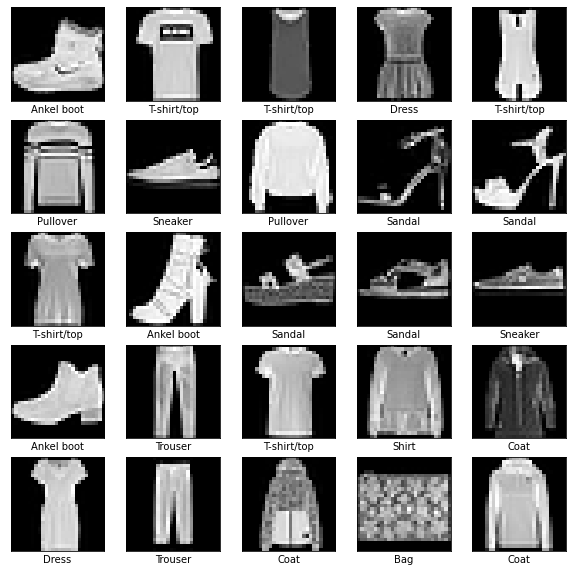

In [25]:
# 정답 레이블
label_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

#이미지 전체 크기
plt.figure(figsize = (10, 10))

#이미지 전체 크기 안에
for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_train_fashion[i], cmap='gray')
        plt.xlabel(label_names[t_train_fashion[i]])
plt.show()

In [26]:
#정규화
x_train_fashion = x_train_fashion.astype('float32') / 255.0
x_test_fashion = x_test_fashion.astype('float32') / 255.0

#숫자 => One-hot Vector(Encoding)
t_train_fashion = to_categorical(t_train_fashion)
t_test_fashion = to_categorical(t_test_fashion)
print('One-hot Vector 적용 후 t_train shape :', t_train_fashion.shape)
print('One-hot Vector 적용 후 t_test shape :', t_test_fashion.shape)

One-hot Vector 적용 후 t_train shape : (60000, 10)
One-hot Vector 적용 후 t_test shape : (10000, 10)


In [27]:
#높이, 너비, 채널(RGB) 설정
width = 28
height = 28
channel = 1

#순차적 모델을 만들기 위한 Sequential(함수)
model = Sequential(name ='Fashion_MNIST_CNN')

#Convolution layer 와 MaxPooling layer를 통해 이미지 특징 추출
#Convolution layer=> filters : 필터 개수, kernel_size: 커널(필터) 크기
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu',
                input_shape = (width, height, channel)))
#pool_size : MaxPooling의 Window size
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#추출한 특징을 완전연결 계층(Dense)으로 전달하기 위해 Flatten 계층을 통해 1차원으로 변경
model.add(Flatten())

#출력층(완전연결 계층)
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer  =Adam(learning_rate = 0.001), metrics = ['accuracy'])
model.summary()

Model: "Fashion_MNIST_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)  

In [28]:
model.fit(x_train_fashion, t_train_fashion, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 88s 23ms/step - loss: 0.4054 - accuracy: 0.8521
Epoch 2/10
3750/3750 [==============================] - 88s 23ms/step - loss: 0.2678 - accuracy: 0.9021
Epoch 3/10
3750/3750 [==============================] - 89s 24ms/step - loss: 0.2275 - accuracy: 0.9179
Epoch 4/10
3750/3750 [==============================] - 90s 24ms/step - loss: 0.1985 - accuracy: 0.9283
Epoch 5/10
3750/3750 [==============================] - 89s 24ms/step - loss: 0.1763 - accuracy: 0.9364
Epoch 6/10
3750/3750 [==============================] - 89s 24ms/step - loss: 0.1559 - accuracy: 0.9423
Epoch 7/10
3750/3750 [==============================] - 87s 23ms/step - loss: 0.1359 - accuracy: 0.9500
Epoch 8/10
3750/3750 [==============================] - 89s 24ms/step - loss: 0.1227 - accuracy: 0.9547
Epoch 9/10
3750/3750 [==============================] - 90s 24ms/step - loss: 0.1084 - accuracy: 0.9604
Epoch 10/10
3750/3750 [==============================] - 91s 24m

1/1 [==============================] - 0s 56ms/step
예측 : Coat\ 정답 : T-shirt/top


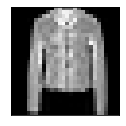

1/1 [==============================] - 0s 50ms/step
예측 : Sandal\ 정답 : Ankel boot


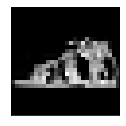

1/1 [==============================] - 0s 57ms/step
예측 : Sandal\ 정답 : Sandal


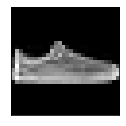

1/1 [==============================] - 0s 50ms/step
예측 : Dress\ 정답 : Sneaker


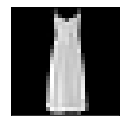

1/1 [==============================] - 0s 50ms/step
예측 : Coat\ 정답 : Ankel boot


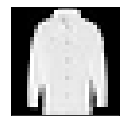

1/1 [==============================] - 0s 50ms/step
예측 : Trouser\ 정답 : Bag


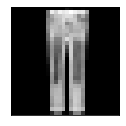

1/1 [==============================] - 0s 57ms/step
예측 : Shirt\ 정답 : Sandal


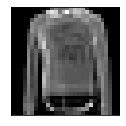

1/1 [==============================] - 0s 49ms/step
예측 : Coat\ 정답 : Sneaker


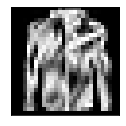

1/1 [==============================] - 0s 50ms/step
예측 : Bag\ 정답 : Bag


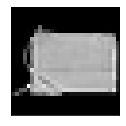

1/1 [==============================] - 0s 45ms/step
예측 : T-shirt/top\ 정답 : Shirt


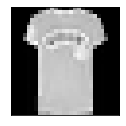

In [36]:
#높이, 너비, 채널 (RGB) 설정
width = 28
height = 28
channel = 1

#정답 레이블
label_name = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

#10개의 test_data로 성능 확인
for i in range(10, 20):
    #출력 이미지 크기 설정
    plt.figure(figsize= (2,2))
    
    #test data를 통한 예측
    output = model.predict(x_test_fashion[i].reshape(1, width, height, channel))
    
    #이미지 출력
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fashion[i].reshape(width, height, channel), cmap='gray')
    
    #np.argmax()는 labels의 인덱스(숫자)가 되어 label의 요소들(이름들)을 출력
    print('예측 : ' + label_names[np.argmax(output)] + '\ 정답 : '  + label_names[np.argmax(t_test[i])])
    plt.show()

In [41]:
#모델 평가
loss, accuracy = model.evaluate(x_test_fashion, t_test_fashion, verbose=1)
print('test loss :', round(loss, 6))
print('test accuracy :', round(accuracy*100, 3), '%')

313/313 [==============================] - 5s 16ms/step - loss: 0.3130 - accuracy: 0.9161
test loss : 0.313043
test accuracy : 91.61 %
